# Lecture 6: Linear Regression, Validation, and Fitting
## 10/16/18

### Hosted by and maintained by the [Statistics Undergraduate Students Association (SUSA)](https://susa.berkeley.edu). Originally authored by [Calvin Chen](mailto:chencalvin99@berkeley.edu) and [Rosa Choe](mailto:rosachoe@berkeley.edu).


### Table Of Contents
* [Linear Regression](#section1)
    * [Introduction](#section1_1)
    * [Why Make A Model?](#section1_2)
    * [Simple Linear Regression](#section1_4)
        * [Loss and the Line of Best Fit](#section1_4_1)
        * [Ordinary Least Squares](#section1_4_2)
        * [Categorical Variables](#categorical)
        * [Making the Model](#making_model)
        * [Interpreting the Model](#interpreting_model)
        * [Assessing the Model](#assessment)
            * [Coefficient of Determination ($R^2$)](#r_squared)
            * [Residual Plots](#residual_plots)
    * [When Can I Use A Linear Model?](#when_to_use)
    * [Multiple Linear Regression](#section1_5)
* [Fitting](#fitting)
    * [Underfitting](#underfitting)
        * [Data Transformation](#data_transformation)
    * [Overfitting](#overfitting)
        * [$R^2$ and Overfitting](#r_squared_overfitting)
        * [Overfitting Demo](#overfitting_demo)
* [Validation](#validation)
* [Recap](#recap)
* [Why Is Linear Regression Great?](#linear_regression_great)




In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from plotting import overfittingDemo, plot_multiple_linear_regression
from scipy.optimize import curve_fit

In [2]:
titanic_df = pd.read_excel('titanic3.xls', 'titanic3', index_col=None, na_values=['NA'])

<a id='section1'></a>
# Linear Regression

<a id='section1_1'></a>
## Introduction

Let's say there's a room of people and you want to guess their weights. You don't know anything about them, so what would your best guess be for each person?

What if you're now given the heights of each person in the room; do you think you could make a better estimate for their weights now?

<a id='section1_2'></a>
## Why Make A Model?

As you saw in the example above, a big reason for making a model is to make predictions. We use existing data to make a **model** that will help us predict the values of future events or observations given the value of the predictive variable. A **model** is just a simplified representation of reality. In the case above, we could make a model to predict weights based on heights, and whatever model we make would be a simplification of the true relationship between weight and height.

Another reason for making a model is to describe the relationship between variables. Let's say you want to show that there's a relationship between two variables, say, smoking and incidence of cancer. Showing *what* the relationship is would strengthen your argument that there is one.

That's not to say that just because you can make a model describing a relationship between two variables, one necessarily causes the other! All we're trying to do here is show that there is *a* relationship (or correlation) between variables, not that there is a _causal_ relationship.

<a id='section1_4'></a>
## Simple Linear Regression

One of the simplest models is a **simple linear regression model**. As the name suggests, it models the relationship as a *line*. You may be familiar with the slope-intercept form of a line, and that's exactly how the linear model looks!

$$y = mx+b$$

Here, $y$ is the variable we're trying to predict, and $x$ is an explanatory variable used to predict $y$. In the case of our weight and height example, $y$ would represent weight, while $x$ represents height. Using known $x$'s, we want to accurately predict $y$ using the right $m$ and $b$.


<a id='section1_4_1'></a>
### Loss and the Line of Best Fit
How do we figure out what $m$ and $b$ are? We do this by defining a *loss function*. The **loss function** is a function that measures how far off our model's estimated values are from the true values. We want our model to be as accurate as possible, so that means we want to minimize the error our model makes in predicting values. In other words, we want to minimize the loss. Another name for the line that minimizes the error is the **line of best fit**. It's a pretty descriptive name, since it's the line that fits our data the best. The *loss function* helps us define what is *best fit*. 

<a id='section1_4_2'></a>
### Ordinary Least Squares
In the case of linear regression, we generally use the method of **ordinary least squares (OLS)**, which minimizes the sum of squared residuals. A **residual** is the difference between the predicted value and the observed value for a given $x$. For a given observation $(x_i, y_i)$, the residual $e_i$ is calculated as:

$$ \underbrace{e_{i}}_{error} = \underbrace{y_i}_{actual} - \underbrace{\hat{y_i}}_{predicted} = y_i - mx_i - b$$

**Question**: Can you think of why we would want to *square* the residuals and sum them instead of just minimizing their sum?


Since we want to minimize the **residual sum of squares (RSS)**, what we're actually going to minimize is this:

$$\textit{RSS} = \sum_{i=0}^n {e_i}^2 = \sum_{i=0}^n (y_i - mx_i - b)^2$$

By minimizing this function, we can solve for slope $m$ and the intercept $b$. The actual calculations for deriving the formulas that define these coefficients requires a bit of calculus, so we'll skip that part for now, but if you want to look into it more on your own you can check out [this link](http://seismo.berkeley.edu/~kirchner/eps_120/Toolkits/Toolkit_10.pdf)! For now, we'll just tell you that $m$ and $b$ can be solved as:

$$\begin{aligned}
\hat{b}&=\bar {y}-\hat{m}\,{\bar{x}},\\
\hat{m}&=\frac{\sum _{i=1}^{n}(x_{i}-\bar{x})(y_{i}-\bar {y})}{\sum _{i=1}^{n}(x_{i}-\bar{x})^2}\\
\end{aligned}$$

This is pretty complicated! Luckily, you don't need to know any of this to make a linear model, but this is here for reference if you're interested in the math behind what we'll be getting into today. 

<a id='categorical'></a>
### Categorical Variables

Unfortunately, the `titanic` dataset you're familiar with isn't the best suited for linear regression. If you look at the scatterplots below, they aren't really that informative or suggestive of much of a linear relationship between the variables. Linear regression is great for numerical data, but not as good for *categorical* data. A lot of the variables in the dataset are **categorical**, including the `pclass` and `sibsp` variables, but those are at least **ordinal**, while variables like `sex` and `cabin` are **nominal**. 

- **categorical**: a variable that has discrete values that represent *categories*
    - **ordinal**: a categorical variable whose categories have a clear *ordering*, so the categories have numerical meaning
        - e.g. `first class`, `second class`
    - **nominal**: a categorial variable whose categories exist by *name* only, with no inherent numerical value or ordering
        - e.g. `female`, `male` 
    
We'll talk more about categorical variables in a future lecture, and how we can use them in our linear models, but for now, let's try to find a better dataset to work with.

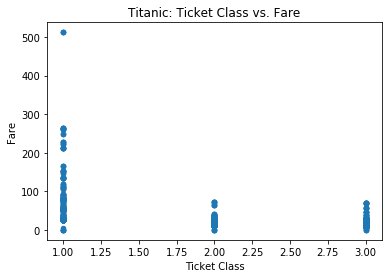

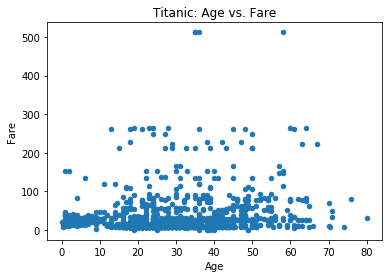

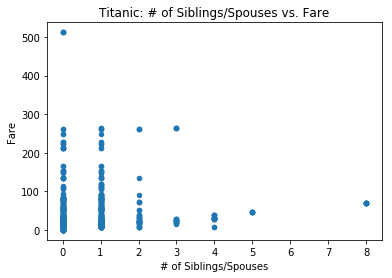

In [3]:
titanic_df.plot.scatter("pclass", "fare")
plt.title("Titanic: Ticket Class vs. Fare")
plt.xlabel("Ticket Class")
plt.ylabel("Fare")

titanic_df.plot.scatter("age", "fare")
plt.title("Titanic: Age vs. Fare")
plt.xlabel("Age")
plt.ylabel("Fare")

titanic_df.plot.scatter("sibsp", "fare")
plt.title("Titanic: # of Siblings/Spouses vs. Fare")
plt.xlabel("# of Siblings/Spouses")
plt.ylabel("Fare");

<a id='making_model'></a>
### Making the Model

Run the cell below to find the new dataset we found to work with!

In [4]:
mpg = pd.read_csv("./mpg.csv", index_col="name") # load mpg dataset
mpg = mpg.loc[mpg["horsepower"] != '?'].astype(int) # remove columns with missing horsepower values
mpg_train, mpg_test = train_test_split(mpg, test_size = .2, random_state = 0) # split into training set and test set
mpg_train, mpg_validation = train_test_split(mpg_train, test_size = .5, random_state = 0)
mpg_train.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
name,,,,,,,,
toyota corolla,34,4,108,70,2245,16,82,3
buick century,17,6,231,110,3907,21,75,1
cadillac eldorado,23,8,350,125,3900,17,79,1
bmw 320i,21,4,121,110,2600,12,77,2
ford fairmont futura,24,4,140,92,2865,16,82,1


Here we've chosen the `mpg` dataset, which tells us various attributes of different cars, including a car's make and model, miles per gallon, number of cylinders, weight, and more! We're going to be trying to see which features affect a car's `mpg`, and our goal is to create a model that accurately predicts `mpg` given other attributes of the car. 

You'll notice that we separated the `mpg` data into two separate dataframes, `mpg_train` and `mpg_test`. We'll get into why in a later part of today's lecture, but for now, make sure to do all of your analysis and model creation on the `mpg_train` dataset! 

Take a look at some of the other features in the dataset, and see which variables produce interesting scatterplots by replacing `"displacement"` in the cell below!

**Exercise:** Replace "displacement" in the line of code below with different column names in the mpg_train dataset, and take a look at the different visualizations you can make! (You can refer to the column labels in the table above).

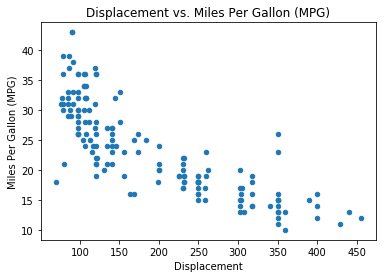

In [5]:
mpg_train.plot.scatter("displacement", "mpg") # try different values instead of "displacement" here

plt.title("Displacement vs. Miles Per Gallon (MPG)")
plt.xlabel("Displacement")
plt.ylabel("Miles Per Gallon (MPG)");

Below we've defined a helper function `get_features()` that takes a dataframe, a list of column names that you want to use as predictor variables (features) and the column name of the variable you're predicting. You can take a look at the documentation for the function as well as the function body if you want to take a deeper look into what the function is doing, but basically we're selecting the relevant columns, removing missing rows, and transforming the columns into a form that the `LinearRegression.fit()` function expects.

In [13]:
from sklearn.linear_model import LinearRegression

def get_features(data, col_list, y_name):
    """
    Function to return a numpy matrix of pandas dataframe features, given k column names and a single y column
    Outputs X, a n X k dimensional numpy matrix, and Y, an n X 1 dimensional numpy matrix.
    This is not a smart function - although it does drop rows with NA values. It might break. 
    
    data(DataFrame): e.g. mpg, mpg_train
    col_list(list): list of columns to extract data from
    y_name(string): name of the column you to treat as the y column
    
    Ideally returns one np.array of shape (len(data), len(col_list)), and one of shape (len(data), len(col_list))
    """
    
    # keep track of numpy values
    feature_matrix = data[col_list + [y_name]].dropna().values
    return feature_matrix[:, :-1], feature_matrix[:, -1]

<a id='try_it'></a>
#### Try It Yourself!
Using the `get_features()` function and the `feature_cols` array, choose a variable of your choosing (other than `mpg`) and try to fit a linear model in the cell below.

In [22]:
# Initialize our linear regression model
linear_model = LinearRegression()

# X is a matrix of inputs, Y is the variable we are trying to learn
feature_cols = ['displacement']
X, Y = get_features(mpg_train, feature_cols, 'mpg')

# Fit the model to the data
linear_model.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Wow, that was anticlimactic! It seems like nothing happened. However, behind the scenes, our `linear_model` variable has now been fit to the data we passed into the `fit()` function! We can see what the `slope` and `intercept` are by looking into the `coef_` and `intercept_` attributes of our `linear_model`.

In [23]:
linear_model.coef_, linear_model.intercept_

(array([-0.06129822]), 35.20358340855422)

You might notice that, while the `intercept_` is a single scalar value, `coef_` returns an array. This is because you can choose to fit your model to multiple explanatory variables (hence the list form of `feature_cols`). When you define multiple explanatory variables, the `coef_` will contain a separate coefficient for each explanatory variable you chose! You'll be able to explore that in a bit, but for now let's take a look at what our linear model looks like relative to our original data.

We've defined a helper function for you that takes the `linear_model` you've created, as well as a string representing the column you chose to make your model on, and plots your linear model against the training data. Let's try to see how well our line fits the data! 

In [24]:
def overlay_simple_linear_model(data, x_name, y_name, linear_model):
    """
    This function plots a simple linear model on top of the scatterplot of the data it was fit to.
    
    data(DataFrame): e.g. mpg_train
    x_name(string): the name of the column representing the predictor variable
    y_name(string): the name of the column representing the dependent/response variable
    linear_model
    
    returns None but outputs linear model overlaid on scatterplot
    """
    slope = linear_model.coef_[0]
    intercept = linear_model.intercept_
    data.plot.scatter(x_name, y_name)
    x = np.arange(max(data[x_name]))
    y = intercept + slope*x
    plt.plot(x, y, color='red')
    plt.title("Linear Model vs. Data: " + x_name + " vs. " + y_name)
    plt.show()

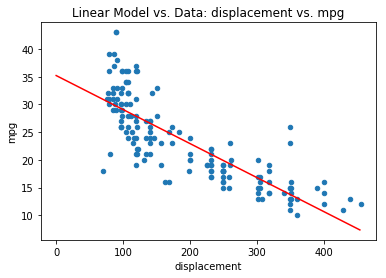

In [25]:
intercept = linear_model.coef_[0]
slope = linear_model.intercept_

overlay_simple_linear_model(mpg_train, "displacement", "mpg", linear_model)

<a id='interpreting_model'></a>
### Interpreting the Model

You're probably thinking "COOL! This looks like a pretty good representation of the data! But what do these coefficients even mean?" That is a great question! As you might have guessed, the `intercept` term is where our line intersects with the y-axis, or when our predictor variable has a value of 0. In relation to our model, it's our prediction for `mpg` given a predictor variable value of 0. The `slope` term is a little more complicated. Yes, it is the slope of the line, but how do we interpret it in the relationship between `mpg` and our explanator?

<a id='assessment'></a>
### Assessing the Model
<a id='r_squared'></a>
#### Coefficient of Determination ($R^2$)
Another question you might have is, how do we know how good our model is? One way of measuring how well your model fits the data is the $R^2$ coefficient, or the **coefficient of determination**. $R^2$ is defined as $1-\frac{RSS}{TSS}$, where RSS is the same as the loss we defined earlier, the **residual sum of squares** and $TSS =\sum _{i}(y_{i}-{\bar {y}})^{2}$, known as the **total sum of squares**, with $\bar{y}$ representing the mean of the sample $y$ values. One way of thinking about the TSS is that it's the loss if you always guessed the mean. Once again, we leave the math here to pique your interest, but understanding it is not required of this workshop.

Basically, what the $R^2$ represents is the proportion of variation in the response variable that is explained by the explanatory variables.

We can obtain our model's $R^2$ value by using our `linear_model`'s `score()` function, like so:

In [26]:
X.shape, Y.reshape(-1, 1).shape

((156, 1), (156, 1))

In [27]:
linear_model.score(X, Y)

0.6600146627660186

Woohoo! If you used `displacement`, our model accurately predicts 66% of the variation in `mpg`. Is this good? Since $R^2$ is a proportion, it's value is always between $0$ and $1$. An $R^2$ value of $0$ would mean that none of the variation of $y$ is explained by $x$, and our model does not explain anything about the data! Our model is essentially guessing the same value each time. An $R^2$ value of $1$ means that our model perfectly fits our data! So, the closer our $R^2$ value is to $1$, the better it fits our data.

In the cell below, see if using a different explanatory variable increases your $R^2$. Make sure to stick with one explanatory variable for now!

**Exercise:** Can you think of a possible feature you could use to make our model have an $R^2$ value of $1$?

In [28]:
linear_model2 = LinearRegression()
feature_cols2 = ['displacement'] # Fill in with other column names!

X2, Y2 = get_features(mpg_train, feature_cols2, 'mpg')

linear_model2.fit(X2, Y2)

linear_model2.score(X2, Y2)

0.6600146627660186

<a id='residual_plots'></a>
#### Residual Plots
Another way of analyzing your model is through *residual plots*. A **residual plot** is kind of what you'd think – it plots your residuals against the corresponding $x$ values. If you see interesting patterns in your residual plot, it's indicative of some *bias* in your model – your error isn't due to randomness in the data but because of an underlying problem in the way you've defined the relationship between your variables. Let's take a look at the residual plot below as an example.

In [29]:
def plot_residuals(data, x_name, y_name, linear_model):
    """
    This function plots a residual plot based off of a simple linear model 
    on top of the scatterplot of the data it was fit to.
    
    data(DataFrame): e.g. mpg_train
    x_name(string): the name of the column representing the predictor variable
    y_name(string): the name of the column representing the dependent/response variable
    linear_model
    
    returns None but outputs residual plot resulting from linear model overlaid on scatterplot
    """
    X, Y = get_features(data, [x_name], y_name)
    plt.scatter(X, linear_model.predict(X) - Y)
    plt.axhline(y=0, color='r', linestyle='-')
    plt.title("Residual Plot: " + x_name + " vs. " + y_name)
    plt.xlabel(x_name)
    plt.ylabel("Residuals")
    plt.show()

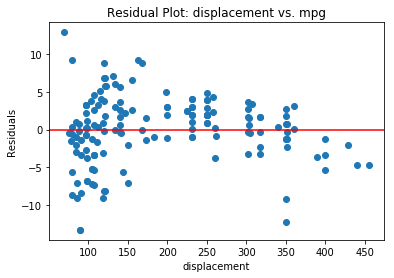

In [30]:
plot_residuals(mpg_train, 'displacement', 'mpg', linear_model)

As you can see, the residuals aren't scattered randomly around the y-axis. The points are more spread out vertically for smaller values of `displacement` and less scattered vertically for larger values. Furthermore, in the middle the residuals are mostly above the line, while on the left and right side, the residuals tend to be below the line. Such a pattern as this one suggests that our model isn't that great at describing the relationship between `displacement` and `mpg`, and there's some fundamental issue with the assumption that the relationship can be modeled by a simple linear relationship. [Here](http://docs.statwing.com/interpreting-residual-plots-to-improve-your-regression/)'s some more information about how to interpret different patterns in residual plots and how you can change your model to fix these errors.

<a id='when_to_use'></a>
### When Can I Use a Linear Model?
Let's talk about some of the assumptions of linear regression, so you know when it's appropriate to use one. 
- There's a linear relationship between the response variable and the explanatory variables.
- There's no pattern in the residual plot.

Now that you're a master of simple linear regression, you're probably thinking "WHY CAN'T I USE MORE EXPLANATORY VARIABLES? What if I think `mpg` depends on two of the variables? Wouldn't that make my model better?" Why, Ms/Mr. Genius Statistician, you *can* use more explanatory variables! That leads us to *multiple linear regression*.

<a id='section1_5'></a>
## Multiple Linear Regression

**Multiple linear regression** is an extension to the simple linear regression model with multiple explanatory variables instead of just one.

With two explanatory variables, we can still visualize the model in a three-dimensional graph, but as we add more and more variables it's pretty much impossible to plot it (can you imagine what a 5D graph would look like?). 

Below is a code chunk that plots the scatterplots of `weight` and `displacement` against `mpg`, as well as the corresponding linear model. It's interactive, so you can drag it around to get a better look at how the model fits the data!

You'll notice that the model is no longer a line – it's a plane. This is the 3D analog to a line. Just as a line defines one value for $y$ for any given $x$, a plane defines one value for $z$ for any pair of $(x, y)$.

<IPython.core.display.Javascript object>


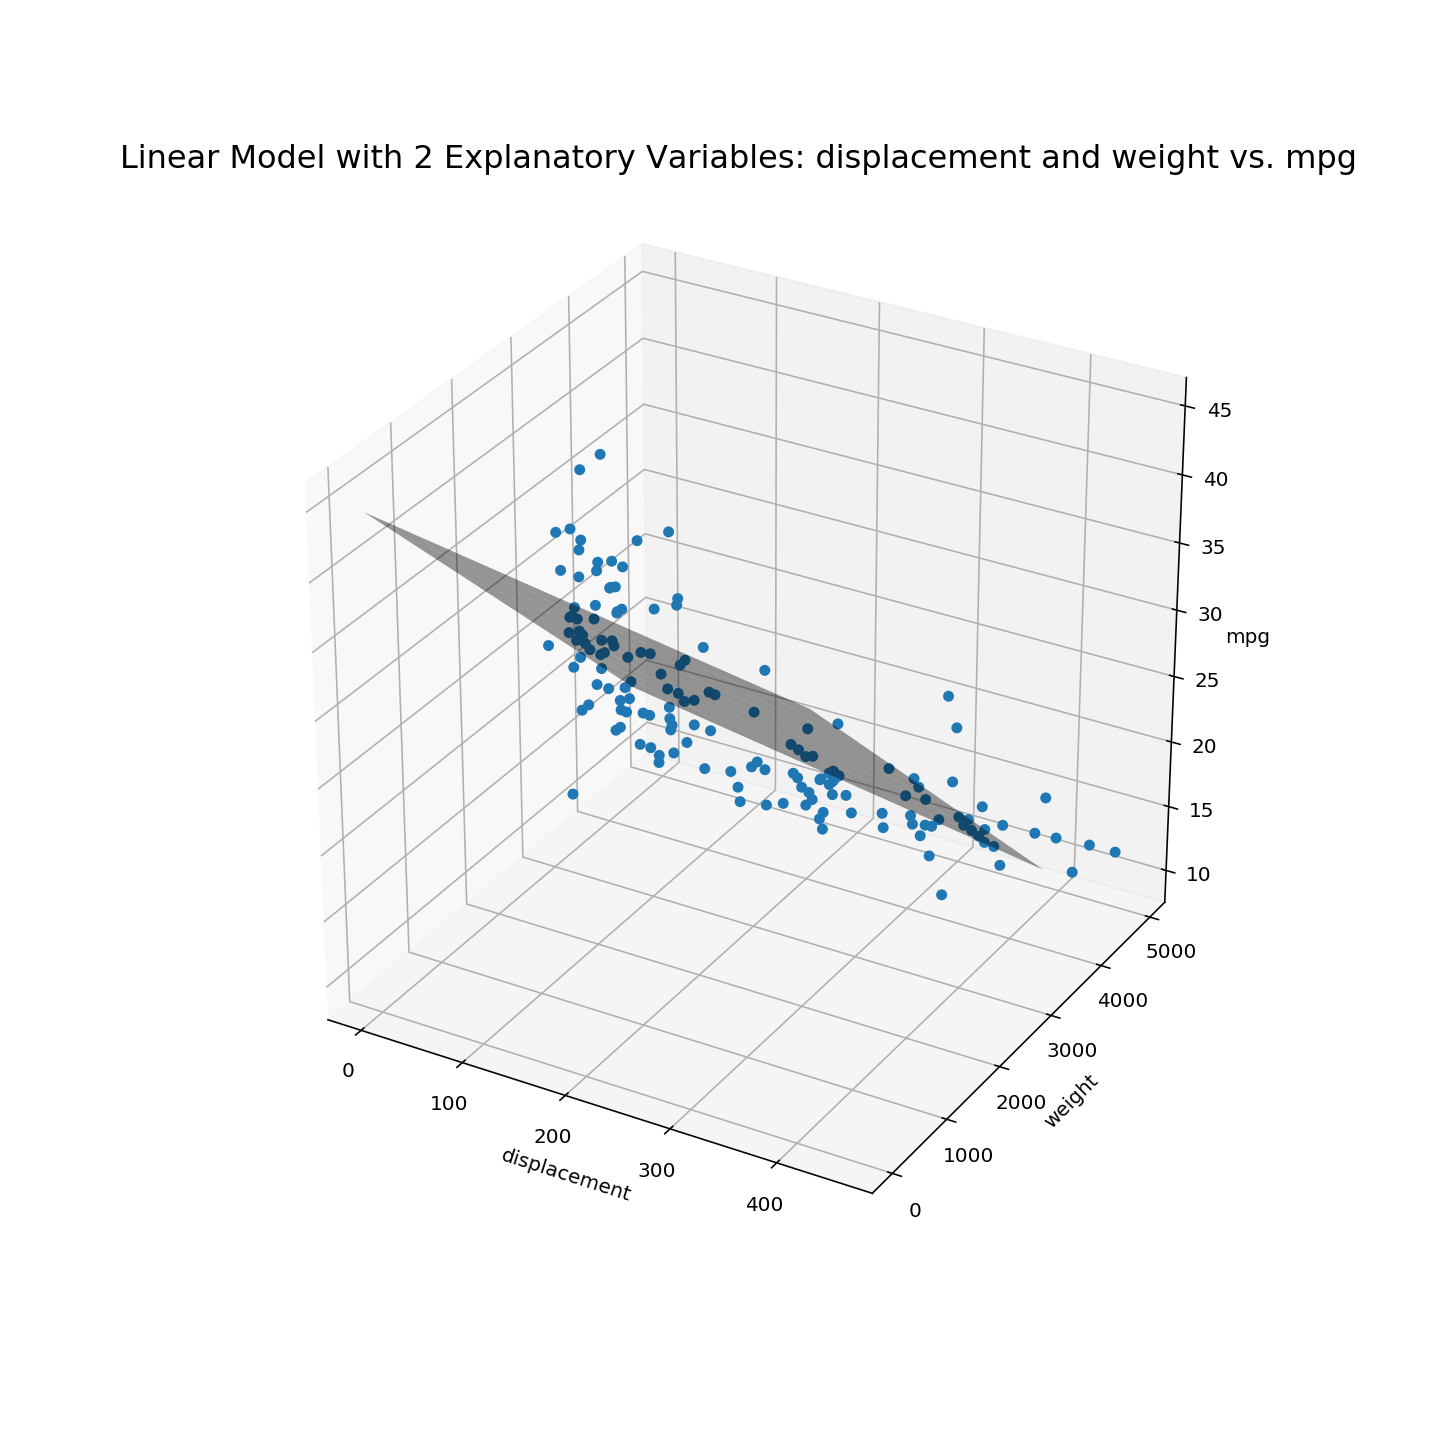

In [32]:
%matplotlib notebook
%matplotlib notebook
plot_multiple_linear_regression(mpg_train, "displacement", "weight", "mpg")

Let's see how well this model does, using the same metric as before, $R^2$.

In [16]:
multiple_model = LinearRegression()
X3, Y3 = get_features(mpg_train, ["displacement", "weight"], "mpg")
multiple_model.fit(X3, Y3)

print("Multiple Linear Regression R^2:", multiple_model.score(X3, Y3))

Multiple Linear Regression R^2: 0.7167008558200321


Lookin' good! Let's compare this $R^2$ value with the $R^2$ of the simple linear models.

In [17]:
dispX, Y = get_features(mpg_train, ["displacement"], "mpg")
wtX, Y = get_features(mpg_train, ["weight"], "mpg")

linear_model.fit(dispX, Y)
print("Simple Linear Regression (displacement) R^2:", linear_model.score(dispX, Y))

linear_model.fit(wtX, Y)
print("Simple Linear Regression (weight) R^2:", linear_model.score(wtX, Y))

Simple Linear Regression (displacement) R^2: 0.6600146627660186
Simple Linear Regression (weight) R^2: 0.7133969003518554


What do you notice about the $R^2$ values of the simple linear regression models and the multiple case?

If you noticed the equation for $R^2$, you'll notice that for a given dataset, it is completely determined by the $RSS$ term, since the total variability is constant across all models. In our method of ordinary least squares regression, we minimize the $RSS$, which maximizes our $R^2$. Adding more variables will only increase our $R^2$ value; making our model more complex will never increase the amount of error in our residuals and will always make our model align more closely to the sample data.  This means that $R^2$ will always make complex models seem 'better', but as we will see later, that is not always the case.

<a id='fitting'></a>
# Fitting

<a id='underfitting'></a>
## Underfitting

So by now you might be thinking, what can't simple linear regression do (on continuous variables)? What we'll soon see is that simple linear regression is not necessarily the best approach to determining the "best-fit" line in a graph.

Take this graph, as an example:

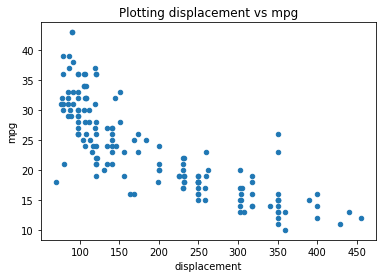

In [18]:
%matplotlib inline
mpg_train.plot.scatter('displacement', 'mpg')
plt.title("Plotting displacement vs mpg");

Let's try to run simple linear regression on the graph above! Here's what we get:

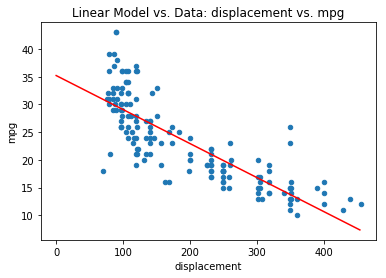

In [19]:
reg = LinearRegression()
X, Y = get_features(mpg_train, ['displacement'], 'mpg')
reg.fit(X, Y)
overlay_simple_linear_model(mpg_train, 'displacement', 'mpg', reg);

As we can see, this isn't necessarily the best scenario where you'd want to use simple linear regression on your data points. The line of best fit clearly misses out on a good chunk of the points towards the middle of the graph, and so, if we had to use this line to predict future points we might want to plot on this graph, we can see how that might not necessarily work out. The line would just plot points in a linear fashion, which isn't what the points seem to be conforming towards.

Another visual that might better convey this predicament is the residual plot of this linear regression. Here's another look at the plot of the residuals of the points after running linear regression on mpg vs. displacement.

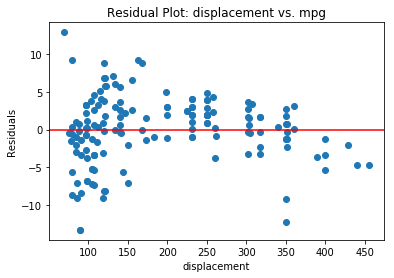

In [20]:
plot_residuals(mpg_train, 'displacement', 'mpg', reg)

From this residual plot, we can see that the simple linear model is not necessarily the best model to fit your data on. We see that the points tend to follow a pattern around the line $y=0$ that doesn't resemble a random scatter. The pattern seems to be similar to a curve, where the initial points are overshooting the linear model, and later points are undershooting the linear model. This demonstrates that we are likely underfitting on our data, and that a different model may be better suited for this data. 

**So, how do we fix this?**

<a id='data_transformation'></a>
### Data Transformation

One way to fix this error in a best fit line is to plot a line that follows the trend of the points better! We can see that the graph above seems to be something similar to a $y = log(x)$ function (just flipped). So, let's make a best-fit line that follows that! That way we don't **underfit** on the data anymore, where our best-fit line consistently doesn't fit certain points, so that way we can better fit the data!

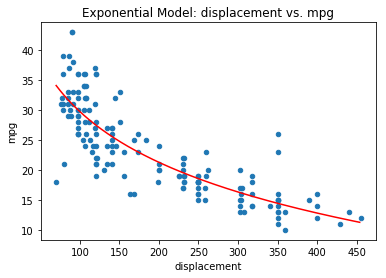

In [21]:
exponential_model = LinearRegression()
expX, expY = get_features(mpg_train, ["displacement"], "mpg")

transformedX = np.log(expX)
exponential_model.fit(transformedX, expY)

x = np.arange(min(expX), max(expX)).reshape((-1, 1))
transformedx = np.log(x)
predicted = exponential_model.predict(transformedx) # predicted values

mpg_train.plot.scatter("displacement", "mpg")
plt.plot(x, predicted, color='red') 
plt.title("Exponential Model: displacement vs. mpg")
plt.show()

Now, our best-fit line seems to fit our data a lot better, and no longer underfits the data as much as it did before! 

As we can see from above, we were able to plot all the points together on the graph and plot a logarithmic regression line to follow the trend of the points. However, another way we could've done the same thing is by transforming the data first, then running a linear regression through it. There isn't necessarily a difference between which method you use to linearize your data, but we just wanted to show you guys that there are multiple ways to get the same regression models!

For example, let's say we plotted $log(mpg)$ vs x, like we do below.

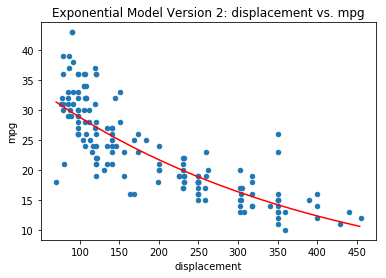

In [22]:
exponential_model2 = LinearRegression()
expX2, expY2 = get_features(mpg_train, ["displacement"], "mpg")

transformedY = np.log(Y)
exponential_model2.fit(X, transformedY)

x2 = np.arange(min(expX2), max(expX2))
predicted = np.exp(exponential_model2.predict(x2.reshape((-1, 1)))) # predicted values

mpg_train.plot.scatter("displacement", "mpg")
plt.plot(x2, predicted, color='red') # we need to transform the x's back by inverting the -np.log(x)
plt.title("Exponential Model Version 2: displacement vs. mpg")
plt.show()

We got nearly the same result no matter which way we went about fitting a regression model on the data. We can see that the logarithmic regression was definitely a better fit for the data than the simple linear regression was, which is a perfect example of increasing your model's complexity (raising the degree of your polynomial) to better fit your data!

<a id='overfitting'></a>
## Overfitting

By now, you might be thinking, why stop at log(y) vs x? Why not go even further? We can probably get a best-fit line that perfectly fits our data! For example, let's plot a 10-degree function (x^10 + x^9 + ... + c) on our data!

In [23]:
def polynomial_stack(X, degrees):
    """
    This function creates a matrix in which each column k contains X^(k+1), e.g. column 0 has X and column 3 has X^4
    
    X(array): an array representing a single column of data
    degrees: the highest degree polynomial to return
    
    returns a np.array of shape (len(X), degrees)
    """
    return np.hstack((np.power(X, i+1) for i in range(degrees)))
    
def polynomial_regression(data, x_name, y_name, degrees):
    """
    This function plots a polynomial regression model overlaid on a scatterplot of the original data.
    
    data(DataFrame): e.g. mpg_train
    x_name(string): the name of the column representing the predictor variable
    y_name(string): the name of the column representing the dependent/response variable
    linear_model
    degrees(int): the degree of the polynomial to fit the model on
    
    returns the polynomial regression model
    """
    X, Y = get_features(data, [x_name], y_name)
    X, Y = X/1000., Y
    poly = LinearRegression()
    X_stack = polynomial_stack(X, degrees)
    poly.fit(X_stack, Y)

    x = np.arange(min(X), max(X)+.001, .001).reshape((-1, 1))
    x_stack = polynomial_stack(x, degrees)
    predicted = poly.predict(x_stack)

    data.plot.scatter(x_name, y_name)
    plt.plot(1000*x, predicted, color='red')
    plt.title("Polynomial Degree " + str(degrees) + " Model: " + x_name + " vs. " + y_name)
    plt.show()
    return poly

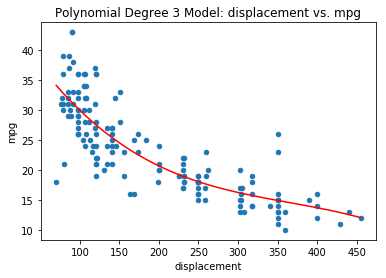

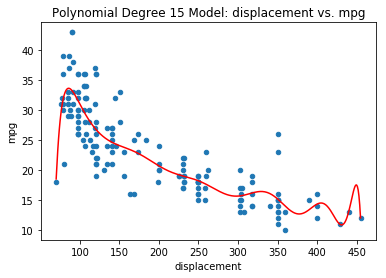

In [24]:
poly_3 = polynomial_regression(mpg_train, "displacement", "mpg", 3)
poly_15 = polynomial_regression(mpg_train, "displacement", "mpg", 15)

As we can see, we cover many more points than we did before with the simple linear regression (x vs y plot). **So why not keep doing this and make more and more complex regression lines (best-fit lines)?**

We refrain from making more and more complex regression lines because these lines are not only used to fit the sample we fit the model on, but we want to use it as a general descriptor of the relationship between these variables. If we wanted to use it to **predict** future points, it wouldn't work that well for most values. Looking at our last model, do you think it accurately describes the `mpg` of a car with `displacement = 450`?

We can imagine how this kind of discrepancy might be the cuase for error in other datasets when we try to get a line of best fit, as in those cases, we may not always know what is nonsensical output. For example, the dataset may not have as clear features as `displacement` and `mpg`, and as a result, you might not be able to determine when you've predicted an output that doesn't make any sense in the context of the data. Or maybe you won't be able to visualize it as easily as we can with only one explanatory variable.

This kind of situation is what we would call **overfitting** our model on our training data. Even though we can make a model fit perfectly on our training data, it doesn't generalize well with other data points we might include, as a model is supposed to show a **generalization of reality**. The more complex model we used to fit our model this time isn't necessarily reflective of what we see happens in real world phenomenon.

<a id='r_squared_overfitting'></a>
### $R^2$ and Overfitting

Let's revisit the $R^2$ coefficient we talked about earlier today. We used it as a method of assessing the quality of our model, since it measures how well our model fits the data. Let's take a look at the $R^2$ values of the polynomial models from the section above; what do you notice about them?

In [25]:
X, Y = get_features(mpg_train, ["displacement"], "mpg")
X_stack_3 = polynomial_stack(X/1000, 3)
print("Degree 3 Polynomial R^2: " + str(poly_3.score(X_stack_3, Y)))

X_stack_15 = polynomial_stack(X/1000, 15)
print("Degree 15 Polynomial R^2: " + str(poly_15.score(X_stack_15, Y)))

Degree 3 Polynomial R^2: 0.7051938737485814
Degree 15 Polynomial R^2: 0.7457304917268062


As we can see from the $R^2$ values, the higher degree of a polynomial we model our data on, the higher the $R^2$ value seems to be. However, if we recall from before, the definition of the $R^2$ value is based off of how well our model predicts the variation in our data. So, the closer our $R^2$ value is to 1, the more variation from our data is accounted in our model, meaning our model can easily be overfitting on our data (If we take into account nearly all the variation in our data, that must mean that our model is passing through very closely to all points). This doesn't necessarily imply that our model is overfitting on our data, as points in a straight line will have $R^2 = 1$ even with a simple linear model, but this is just to show that $R^2$ is sensitive to overfitting.

So, to recap, the $R^2$ of a model can be a misleading measure of how well your model is doing! Just looking at the $R^2$ value of a model on its data can make you think the model is doing really well, when in reality, the model is just overfitting on the data!

<a id='overfitting_demo'></a>
### Overfitting Demo

Now, let's take a look at what overfitting looks like when looking at varying degrees of models on the same data points!

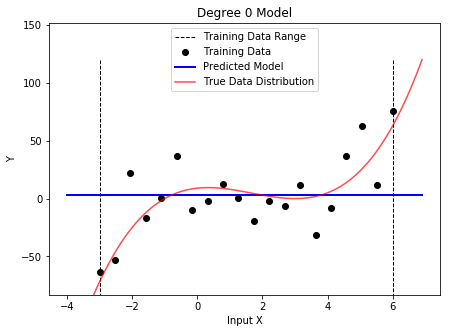

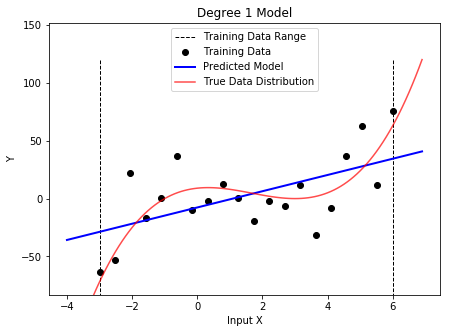

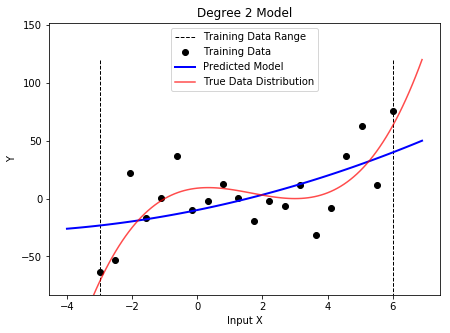

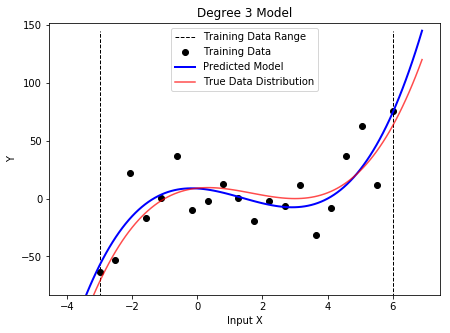

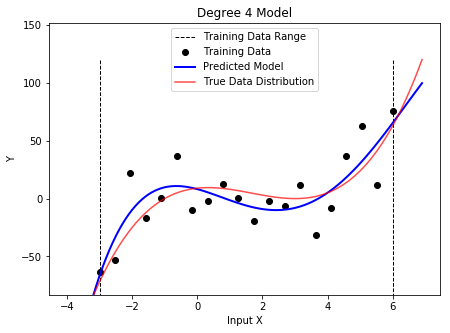

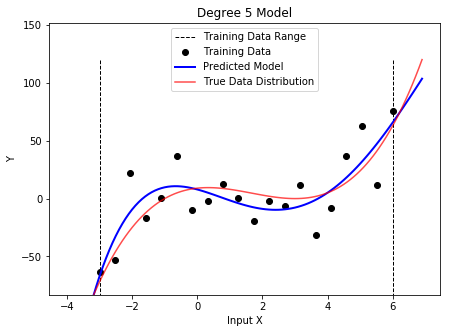

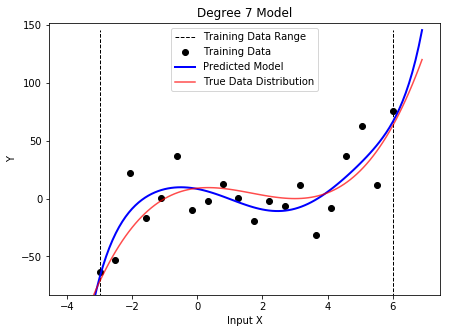

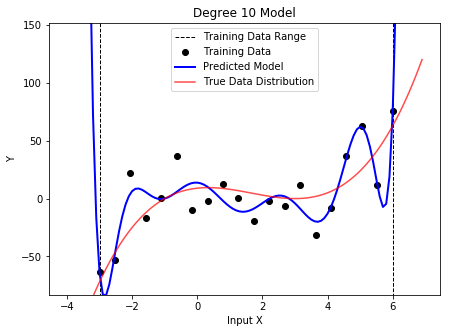

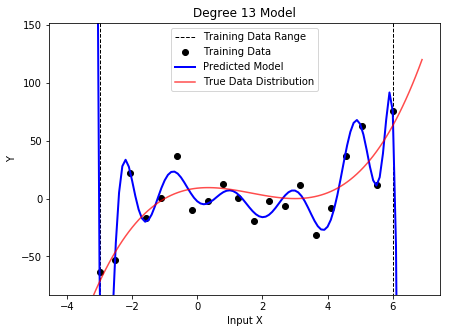

In [26]:
overfittingDemo()

As we can see from above, as we our model's degree beyond a degree 3 model, our predicted model becomes more and more erratic, which isn't necessarily how the true data is distributed.

Now that we know lines of best fit can underfit and overfit our data, we may think we're in a bit of a predicament! **How can we determine what line of best fit best fits our data and generalizes the best with the world?**

The answer is, it's completely relative to your data set! There's no magic number for the maximum degree polynomial you can have when plotting your line of best-fit (though there can be extremes) and the same for the mimumum. However, a general trend for fitting follows something simliar to this chart:

<img src='trueError.png' width="400" height="400">

As we increase in the model order (the max degree polynomial we use as a best fit line for our data), we see that the true error for our graph dips at a certain point, but continuously increases over time after that. What we're trying to do is determine a best-fit line that hovers as close as possible to the point of lowest true error.

**But what's a good strategy to find that?**

Something we call **Validation**!

<a id='validation'></a>
## Validation

So far we've talked a lot about what underfitting and overfitting are, and how to visually detect whether or not your model is doing one or the other. However, we haven't gone into any strategies into how we can achieve some kind of happy medium between underfitting and overfitting, so our model fits well against **the underlying distribution of our data** and also **generalizes well against other data points**.

Well, what if, in order to determine whether or not our model generalizes well against other data points, we **validated** how well our model was doing against some data points, and also **tested** our model against other data points to see how it would compare to other final models?

Now that might be a bit confusing to grasp at first, so we're going to break it down!

#### In order to verify how well our model is doing, we can split our initial data set that we're given into three different groups:
* **Training set:** The set of data points you use to fit your model.
* **Validation set:** The set of data points that you use to fine tune your model's parameters (aka "fine tuning your model's hyperparameters")
    * Hyperparameters are essentially the parameters your model uses, which in our case are the coefficients of our polynomial as well as how high of a degree polynomial would be best to use
* **Test set:** The set of data points that you use to evaluate how well your model that was fit against your training set does against other "outside" data points

You may find that the terms **validation set** and **test set** are sometimes used interchangably in outside works concerning testing how accurate your model is, but we'll be using the formal definitions and uses of all 3 of the sets listed above.

So, instead of getting new data points to test our model against, we just split our initial data set into three groups- typically done in a 40/40/20 split ($40\%$ of data to training, $40\%$ to validation, and $20\%$ to testing). Through this process, we're able to conduct the following steps:
1. Initially fit our model against our **training set**.
2. Use the **validation set** to provide information on which hyperparameters might be best tailored for your model (in our case, which coefficients and which degree polynomial might be the best to use) by repeatedly testing different models against this dataset. At the end, choose whichever hyperparameters for your model that are the most favorable for you (in our case, the most favorable hyperparamters are the ones that reduce as much loss as possible, but this won't necessarily always be the case).
3. Take the favorable model from step 2 and test the model against our **test set**. The result will be an unbiased indicator of how well our model does with "generalizing against other data points".

**Question:** Why do we conduct this entire process, and not just repeated test different models against our test set until we get the lowest error possible?

The reason we don't continuously test against our test set is because that would not only result in a biased evaluation of how well our model is doing, but also because our models would be able to **overfit** by repeatedly trying to lower our error from testing it on our test set. We want to prevent our model from **overfitting** on any data set, including the test set, as the test set is just something we made to conduct tests from our original data. There are limitless possibilities to what our test set could've been like, and so, there can be enough unpredicability within our test set that other test sets we could've made could produce totally different results. So, we try to refrain from testing repeatedly on the test set, and rather just test our final model on the test set to have a final verification on how well it's able to predict and generalize to other data points.

This method of validation, where you initially split your data into a 40/40/20 split and use one of the $40\%$ groups to tune your hyperparameters against is just one of many methods out there. Some other methods of validation include [k-fold cross-validation](https://en.wikipedia.org/wiki/Cross-validation_(statistics%29), [regularization](https://en.wikipedia.org/wiki/Regularization_(mathematics), and [ridge regression](https://en.wikipedia.org/wiki/Tikhonov_regularization). We won't go in detail into these here, but in case you were curious about them, click on them to learn more!

For now, let's do a demo with this on the data we've been using from the `mpg` dataset!

In [27]:
from sklearn.metrics import mean_squared_error

<img src='sudocode.png' width="800" height="800">

In [28]:
X_validation, Y_validation = get_features(mpg_validation, ["displacement"], "mpg")
X_validation_stack_3 = polynomial_stack(X_validation/1000, 3)
pred_3 = poly_3.predict(X_validation_stack_3)
print("Degree 3 Polynomial validation error: " + str(mean_squared_error(Y_validation, pred_3)))

X_validation_stack_15 = polynomial_stack(X_validation/1000, 15)
pred_15 = poly_15.predict(X_validation_stack_15)
print("Degree 15 Polynomial validation error: " + str(mean_squared_error(Y_validation, pred_15)))


Degree 3 Polynomial validation error: 20.77343714407986
Degree 15 Polynomial validation error: 21.174477156331946


It seems like the degree 3 polynomial has lower error based on our validation set, so we will pick that as our final model of the two and evaluate it on our test set!

In [29]:
X_test, Y_test = get_features(mpg_test, ["displacement"], "mpg")
X_test_stack_3 = polynomial_stack(X_test/1000, 3)
pred_3 = poly_3.predict(X_test_stack_3)
print("Degree 3 Polynomial test error: " + str(mean_squared_error(Y_test, pred_3)))

Degree 3 Polynomial test error: 16.2393381297196


### Training Error and Test Error

As we can see, training a model, validating which hyperparameters are the best suited for our model, and then finally testing it to see it's final accuracy are all steps we can follow to create a model that no longer **underfits** or **overfits** on our data. Now above you might see that there's tidbits about **training error** and **test error**. What are those?

* **Training error:** The error returned from running an error function on your model with your training set. In our case, we determine the RMSE (root mean square error) from the data points in our training set to our model
* **Test error:** The error returned from running an error function on your fine-tuned post-validation model with your test set. In our case, we still use the RSME to determine how accurate our model is doing against data points in our test set.

These numerical values for **training error** and **test error** can also be measurements through which we can determine how well our model is doing on our data points. You can imagine that if we wanted to lower our training error, we'd want to better fit a model against our training points. However, as we talked about before, the more we try to fit a model against a dataset, the more likely we are to **overfit**. So, minimizing our **training error** isn't necessarily what we're typically trying to achieve. A good visualization that conveys what we're talking about is shown below:

<img src='training_vs_test_error.png' width="800" height="800">

As we increase in the model order (the max degree polynomial we use as a best fit line for our data), we can see that we lower our **training error**, which can be good in the beginning. We see that our test error is also minimized up until our model reaches degree 3 or so. However, as we continue to lower our **training error**, we see that our **test error** continues to increase. Now, we can see that we're beginning to **overfit** on our training data, and **not generalizing well** against other data points (in this case, our test set).

**In conclusion**, we can see that validation can be an incredibly useful process through which we create a model that fits, but doesn't overfit or underfit, on our data. We also see that different measurable quantities, such as training error and test error, can also be indicative of how well our model is doing at different periods of time, and see how well it's fitting against our data.

<a id='recap'></a>
## Recap

Just to recap, here's a great visual that covers a lot of what we just went over in the Underfitting, Overfitting, and Validation sections in this notebook!

<img src='fit_graphs.png' width="1600" height="1600">

<a id='linear_regression_great'></a>
# Conclusion: Why is Linear Regression Great?

Hopefully you've seen today that one of the advantages of linear regression is that the models are fairly simple and can be easy to interpret, as we illustrated earlier today. However, in some cases a linear model might be *too* simple to properly represent the relationship between the variables you've chosen, even when you've transformed your variables. We also have to make sure that we don't make our model so complicated that it doesn't generalize well to data outside of our sample! Now that you've learned the basics of linear regression, you have the tools to make basic models of whatever you want :) Good luck!